In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as str
from functions import *
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
import scipy.stats as st
#pd.set_option('display.max_rows', 150, 'display.max_columns', 150)


from datetime import datetime

from scipy import stats


# SARIMA
# diagramme de corrélation simple :
from statsmodels.tsa.stattools import acf, pacf

# modèle SARIMA :
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

import itertools
from IPython.display import clear_output
from time import time
import os
os.makedirs('graph', exist_ok=True)


# 1. Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

In [2]:
cons_elec = pd.read_csv('eCO2mix_RTE_energie_M.csv', sep=';', encoding='latin-1', index_col="Mois", parse_dates=True)

cons_elec.head()

,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Mois,,,,,,,,,,,,,,,,,,,,,
2012-01-01,Données définitives,France,57177,42811.0,5399,741.0,691.0,3967,6741.0,1587,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02-01,Données définitives,France,54419,38661.0,8721,2511.0,1309.0,4901,5244.0,1123,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03-01,Données définitives,France,48583,37549.0,5276,1435.0,666.0,3175,3894.0,977,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04-01,Données définitives,France,44192,33100.0,3484,1655.0,486.0,1343,5302.0,1572,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05-01,Données définitives,France,40433,29058.0,1772,854.0,368.0,549,7706.0,974,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [3]:
cons_elec_fr = cons_elec[cons_elec['Territoire']=='France']
cons_elec_fr

,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Mois,,,,,,,,,,,,,,,,,,,,,
2012-01-01,Données définitives,France,57177,42811.0,5399,741.0,691.0,3967,6741.0,1587,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02-01,Données définitives,France,54419,38661.0,8721,2511.0,1309.0,4901,5244.0,1123,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03-01,Données définitives,France,48583,37549.0,5276,1435.0,666.0,3175,3894.0,977,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04-01,Données définitives,France,44192,33100.0,3484,1655.0,486.0,1343,5302.0,1572,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05-01,Données définitives,France,40433,29058.0,1772,854.0,368.0,549,7706.0,974,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,Données consolidées,France,34908,828.0,3943,6269.0,27574.0,1485,18.0,107,...,1232,41333,5939.0,8506.0,2722.0,1734.0,1052.0,1686.0,1045.0,NaN
2021-06-01,Données consolidées,France,32443,774.0,1340,6216.0,27716.0,2050,29.0,132,...,1559,39657,6840.0,8768.0,2075.0,1745.0,1371.0,1610.0,1141.0,NaN
2021-07-01,Données consolidées,France,32977,891.0,2292,5626.0,28449.0,1707,54.0,159,...,1605,40573,7268.0,9252.0,2080.0,1907.0,1316.0,2090.0,1353.0,NaN


In [4]:
dju = pd.read_csv("calcul_DJU_02_12_2021.csv", sep=";", skiprows=11, encoding='latin_1', decimal=",")
dju

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2021,417.0,311.6,296.0,256.1,154.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,1437.0
1,2020,356.2,260.9,283.1,99.6,82.0,27.2,1.9,4.3,37.3,165.0,245.8,351.9,1914.9
2,2019,428.6,296.0,265.4,195.0,140.9,31.3,0.0,2.2,32.8,138.8,295.9,344.6,2171.3
3,2018,322.3,456.9,332.4,142.8,74.4,12.6,0.0,7.0,52.1,137.1,298.2,349.7,2185.1
4,2017,498.8,301.0,234.4,229.1,88.7,12.5,2.0,13.4,84.9,126.9,311.1,394.2,2296.7
5,2016,389.3,347.5,346.3,247.9,116.4,34.6,10.5,6.7,21.9,204.4,310.6,426.0,2461.9
6,2015,422.7,392.8,307.4,180.5,121.2,26.3,11.5,9.1,99.0,205.8,216.1,269.3,2261.6
7,2014,344.5,295.6,270.0,167.3,125.1,31.2,12.4,32.8,30.6,109.9,242.2,397.6,2058.9
8,2013,453.5,427.5,400.5,237.1,183.3,56.3,2.5,12.1,57.3,122.4,323.9,381.8,2657.8
9,2012,365.4,466.9,241.2,257.0,96.8,48.8,24.1,3.0,83.5,164.7,317.8,370.3,2439.3


In [5]:
# à ameliorer
dju.rename(columns={"Unnamed: 0":'Annee', 'JAN':'01', 'FÉV':'02', 'MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)
dju.drop(columns={'Total'}, index=0, inplace=True)
dju

,Annee,01,02,03,04,05,06,07,08,09,10,11,12
1,2020,356.2,260.9,283.1,99.6,82.0,27.2,1.9,4.3,37.3,165.0,245.8,351.9
2,2019,428.6,296.0,265.4,195.0,140.9,31.3,0.0,2.2,32.8,138.8,295.9,344.6
3,2018,322.3,456.9,332.4,142.8,74.4,12.6,0.0,7.0,52.1,137.1,298.2,349.7
4,2017,498.8,301.0,234.4,229.1,88.7,12.5,2.0,13.4,84.9,126.9,311.1,394.2
5,2016,389.3,347.5,346.3,247.9,116.4,34.6,10.5,6.7,21.9,204.4,310.6,426.0
6,2015,422.7,392.8,307.4,180.5,121.2,26.3,11.5,9.1,99.0,205.8,216.1,269.3
7,2014,344.5,295.6,270.0,167.3,125.1,31.2,12.4,32.8,30.6,109.9,242.2,397.6
8,2013,453.5,427.5,400.5,237.1,183.3,56.3,2.5,12.1,57.3,122.4,323.9,381.8
9,2012,365.4,466.9,241.2,257.0,96.8,48.8,24.1,3.0,83.5,164.7,317.8,370.3
10,2011,417.5,331.9,275.7,113.9,66.4,41.6,27.7,21.6,33.8,151.7,252.8,340.3


In [6]:
dju_cor = pd.melt(dju, id_vars=['Annee'], value_vars=['01','02','03','04','05','06','07','08','09','10','11','12'])
dju_cor.dtypes

Annee         int64
variable     object
value       float64
dtype: object

In [7]:
dju_cor

,Annee,variable,value
0,2020,01,356.2
1,2019,01,428.6
2,2018,01,322.3
3,2017,01,498.8
4,2016,01,389.3
...,...,...,...
139,2013,12,381.8
140,2012,12,370.3
141,2011,12,340.3
142,2010,12,542.3


In [8]:
dju_cor[["Annee", "variable"]] = dju_cor[["Annee","variable"]].astype('string')
dju_cor.dtypes

Annee        string
variable     string
value       float64
dtype: object

In [9]:
dju_cor['Date'] = dju_cor['Annee'].str.cat(dju_cor['variable'])

dju_cor

,Annee,variable,value,Date
0,2020,01,356.2,202001
1,2019,01,428.6,201901
2,2018,01,322.3,201801
3,2017,01,498.8,201701
4,2016,01,389.3,201601
...,...,...,...,...
139,2013,12,381.8,201312
140,2012,12,370.3,201212
141,2011,12,340.3,201112
142,2010,12,542.3,201012


In [10]:
dju_cor=dju_cor[["Date", 'value']]
dju_cor.dtypes

Date      string
value    float64
dtype: object

In [11]:
dju_cor['Date'] = pd.to_datetime(dju_cor['Date'], format='%Y%m')
dju_cor.rename(columns={'Date':'Mois','value':'Dju'}, inplace=True)
dju_cor

<ipython-input-11-36f19dd1e506>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dju_cor['Date'] = pd.to_datetime(dju_cor['Date'], format='%Y%m')
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Mois,Dju
0,2020-01-01,356.2
1,2019-01-01,428.6
2,2018-01-01,322.3
3,2017-01-01,498.8
4,2016-01-01,389.3
...,...,...
139,2013-12-01,381.8
140,2012-12-01,370.3
141,2011-12-01,340.3
142,2010-12-01,542.3


In [12]:
cons_tot = cons_elec_fr[['Consommation totale']]
#data = data.set_index('Mois')
cons_tot

,Consommation totale
Mois,
2012-01-01,51086
2012-02-01,54476
2012-03-01,43156
2012-04-01,40176
2012-05-01,35257
...,...
2021-05-01,41333
2021-06-01,39657
2021-07-01,40573


In [13]:
data = cons_tot.merge(dju_cor, on='Mois', how='inner')
data['Mois'] = pd.to_datetime(data['Mois'], format='%Y%m')
data.set_index('Mois')

,Consommation totale,Dju
Mois,,
2012-01-01,51086,365.4
2012-02-01,54476,466.9
2012-03-01,43156,241.2
2012-04-01,40176,257.0
2012-05-01,35257,96.8
...,...,...
2020-08-01,31428,4.3
2020-09-01,32307,37.3
2020-10-01,38332,165.0


In [14]:
dju

,Annee,01,02,03,04,05,06,07,08,09,10,11,12
1,2020,356.2,260.9,283.1,99.6,82.0,27.2,1.9,4.3,37.3,165.0,245.8,351.9
2,2019,428.6,296.0,265.4,195.0,140.9,31.3,0.0,2.2,32.8,138.8,295.9,344.6
3,2018,322.3,456.9,332.4,142.8,74.4,12.6,0.0,7.0,52.1,137.1,298.2,349.7
4,2017,498.8,301.0,234.4,229.1,88.7,12.5,2.0,13.4,84.9,126.9,311.1,394.2
5,2016,389.3,347.5,346.3,247.9,116.4,34.6,10.5,6.7,21.9,204.4,310.6,426.0
6,2015,422.7,392.8,307.4,180.5,121.2,26.3,11.5,9.1,99.0,205.8,216.1,269.3
7,2014,344.5,295.6,270.0,167.3,125.1,31.2,12.4,32.8,30.6,109.9,242.2,397.6
8,2013,453.5,427.5,400.5,237.1,183.3,56.3,2.5,12.1,57.3,122.4,323.9,381.8
9,2012,365.4,466.9,241.2,257.0,96.8,48.8,24.1,3.0,83.5,164.7,317.8,370.3
10,2011,417.5,331.9,275.7,113.9,66.4,41.6,27.7,21.6,33.8,151.7,252.8,340.3


In [15]:
data.dtypes

Mois                   datetime64[ns]
Consommation totale             int64
Dju                           float64
dtype: object

In [16]:
#cons_elec_fr[cons_elec_fr['Mois'].str.contains('2020')]

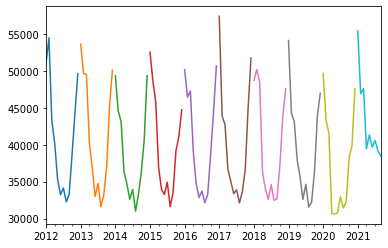

In [17]:
cons_tot.loc['2012':'2021'].resample('Y').plot()
plt.show()

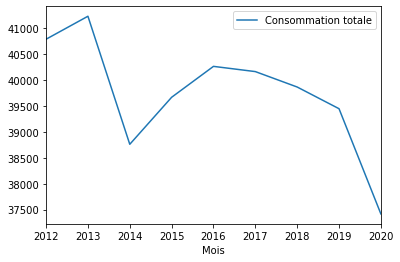

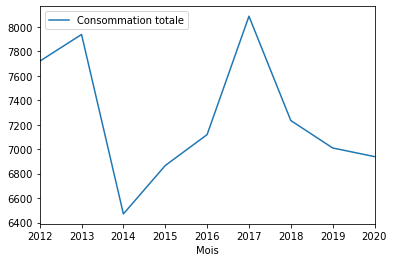

In [18]:
# L'évolution de la température annuelle moyenne de 2012 à 2021
cons_tot.loc['2012':'2020'].resample('Y').mean().plot()
cons_tot.loc['2012':'2020'].resample('Y').std().plot()

plt.show()

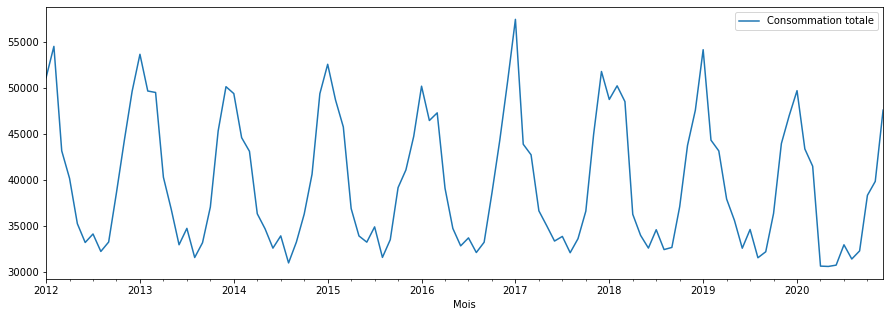

In [19]:
data.plot(x="Mois", y="Consommation totale", figsize=(15,5))
plt.savefig("graph/cons_tot.png")

In [20]:
data['log_data_cons'] = np.log(data["Consommation totale"])
data.rename(columns={'Mois':'Annee'}, inplace=True)
data

,Annee,Consommation totale,Dju,log_data_cons
0,2012-01-01,51086,365.4,10.841266
1,2012-02-01,54476,466.9,10.905516
2,2012-03-01,43156,241.2,10.672577
3,2012-04-01,40176,257.0,10.601025
4,2012-05-01,35257,96.8,10.470419
...,...,...,...,...
103,2020-08-01,31428,4.3,10.355454
104,2020-09-01,32307,37.3,10.383039
105,2020-10-01,38332,165.0,10.554040
106,2020-11-01,39840,245.8,10.592627


<AxesSubplot:xlabel='Annee'>

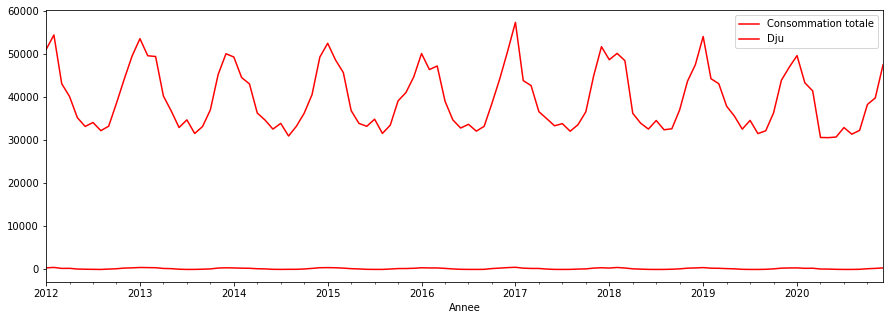

In [21]:
data[['Annee','Consommation totale','Dju']].plot(x='Annee', y=['Consommation totale','Dju'], figsize=(15,5), color='r')

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

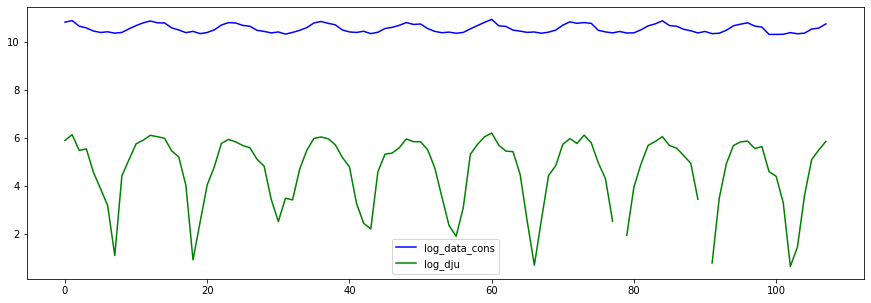

In [22]:
data['log_dju'] = np.log(data["Dju"])
data[["Annee","log_dju", 'log_data_cons']].plot(y=["log_data_cons","log_dju"], figsize=(15,5), color=['blue','green'])

In [23]:
# On souhaite désaisonnaliser la série temporelle consommation corrigée à l'aide de la régression linéaire.
# On créé à cet effet les bases tendancielle et saisonnière :

In [24]:
import statsmodels.api as sm

In [25]:
x = sm.add_constant(data['Dju'])
y = data['Consommation totale']
reg_result = sm.OLS(y, x).fit()

In [26]:
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Consommation totale   R-squared:                       0.935
Model:                             OLS   Adj. R-squared:                  0.934
Method:                  Least Squares   F-statistic:                     1521.
Date:                 Sat, 01 Jan 2022   Prob (F-statistic):           1.08e-64
Time:                         18:09:14   Log-Likelihood:                -962.78
No. Observations:                  108   AIC:                             1930.
Df Residuals:                      106   BIC:                             1935.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.095e+04    285.103    108.570      0.000    3.04e+04    3.15e+04
Dju           46.3881      1.189     39.005      0.000      44.030      48.746
==============================================================================
Omnibus:                        0.497   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.280
Skew:                          -0.121   Prob(JB):                        0.869
Kurtosis:                       3.063   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
st.shapiro(reg_result.resid)


ShapiroResult(statistic=0.9849681854248047, pvalue=0.26610511541366577)

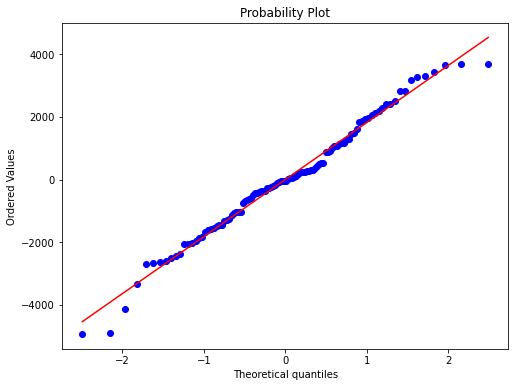

In [28]:
# on affiche le Q-Q plot
fig, ax = plt.subplots(figsize=(8,6))
_=st.probplot(reg_result.resid, plot=ax, fit=True)
plt.savefig("graph/q_q_plot_resid.png")

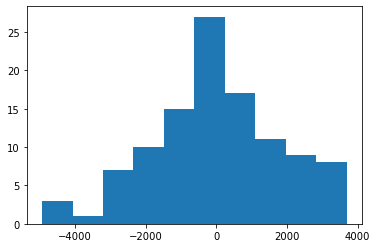

In [29]:
res = plt.hist(reg_result.resid)
plt.savefig('graph/res_graph.png')

In [30]:
reg_result.params['Dju']

46.388084924367206

In [31]:
data['Consommation corrigee'] = (data['Consommation totale'] - data['Dju'] * reg_result.params['Dju']).astype(int)
data.set_index('Annee', inplace=True)
data

,Consommation totale,Dju,log_data_cons,log_dju,Consommation corrigee
Annee,,,,,
2012-01-01,51086,365.4,10.841266,5.900993,34135
2012-02-01,54476,466.9,10.905516,6.146115,32817
2012-03-01,43156,241.2,10.672577,5.485626,31967
2012-04-01,40176,257.0,10.601025,5.549076,28254
2012-05-01,35257,96.8,10.470419,4.572647,30766
...,...,...,...,...,...
2020-08-01,31428,4.3,10.355454,1.458615,31228
2020-09-01,32307,37.3,10.383039,3.618993,30576
2020-10-01,38332,165.0,10.554040,5.105945,30677


In [32]:
data.sort_index(inplace=True)

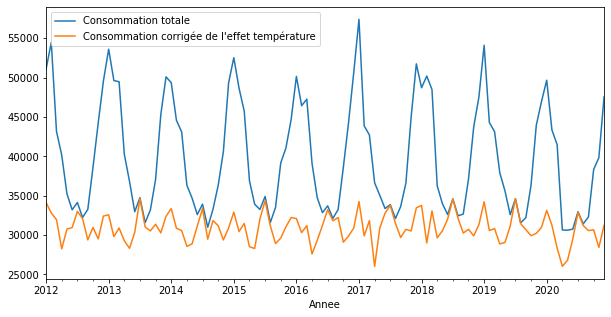

In [33]:
data.plot(y = ['Consommation totale', 'Consommation corrigee'], label=["Consommation totale", "Consommation corrigée de l'effet température"], figsize=(10,5))
plt.savefig('graph/const_tot_vs_cons_corr.png')


# 2. Effectuez une désaisonnalisation de la consommation que vous aurez obtenue après correction, grâce aux moyennes mobiles.


<AxesSubplot:xlabel='Annee'>

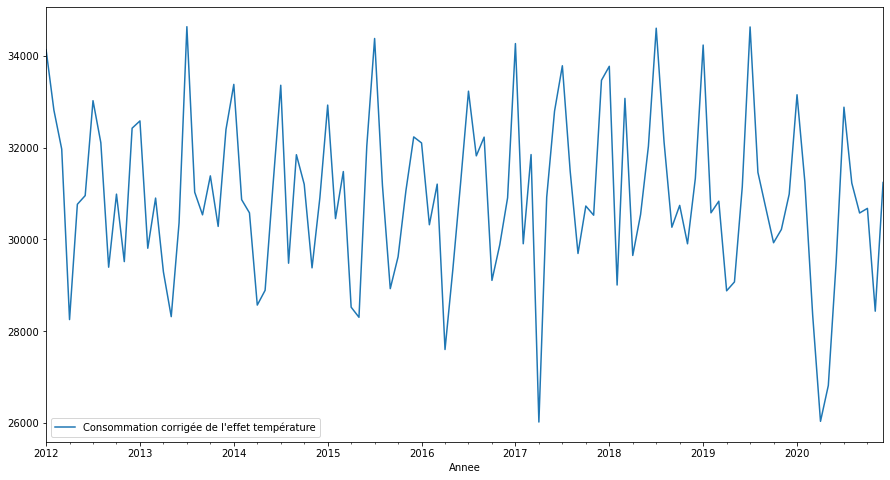

In [34]:
data.plot(y='Consommation corrigee', label="Consommation corrigée de l'effet température", figsize=(15,8))

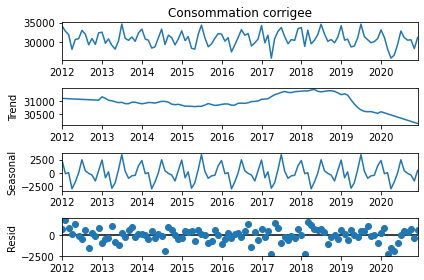

In [35]:
decomp_x = seasonal_decompose(data['Consommation corrigee'],  model='additive', extrapolate_trend='freq',period=24)
decomp_x.plot()
plt.savefig('graph/seas_decompose.png')
plt.show()


# L'écart entre le pic et le creux de la courbe sur une période de 12 mois n'est ni croissante ni décroissante (notre écart est stable) donc on a un modèle additif

# 3 Effectuez une prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel) puis la méthode SARIMA sur la série temporelle.
Pour chaque traitement effectué (correction de l'effet température, désaisonnalisation, etc.), vous présenterez les 2 séries temporelles avant et après traitement, sur un graphique où les deux séries temporelles seront superposées.



a) Prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel)

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing

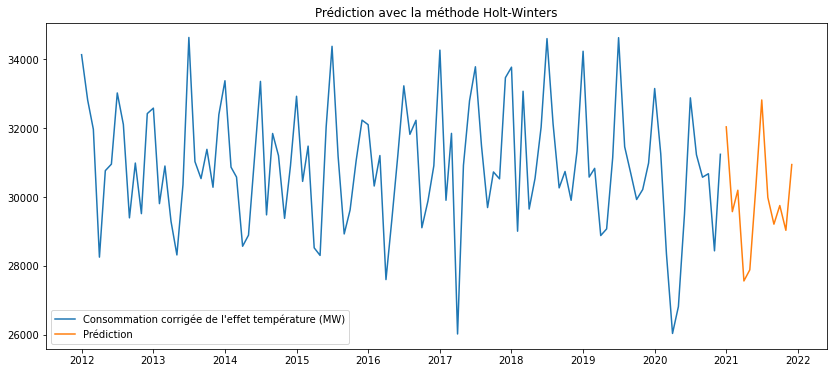

In [37]:
duree = 12
troncature = duree

y = data['Consommation corrigee']

y_tronc = y[:-troncature]
y_a_prevoir = y[-troncature:]
#Prévision avec la méthode Holt Winters
#On va utiliser le modèle additif, pour les mêmes raisons que précédemment et une période observée de 12.

# création du modèle
holtwinters_model1 = ExponentialSmoothing(np.asarray(y), seasonal_periods=12, trend='additive', seasonal='additive').fit()

# prédiction
holtwinters_pred1 = holtwinters_model1.forecast(duree)
# on ajoute en index les dates correspondantes aux prédictions
holtwinters_pred1 = pd.Series(holtwinters_pred1, index = pd.date_range(data.index.max(), periods=duree, freq='M'))
plt.figure(figsize=(14,6))
plt.plot(y, label="Consommation corrigée de l'effet température (MW)")
plt.plot(holtwinters_pred1, label='Prédiction')
plt.title('Prédiction avec la méthode Holt-Winters')
_ =plt.legend()
plt.savefig('graph/holtwinters_pred1.png')

In [38]:
# Faire une prédiction sur l'année 2020 pour la méthode HW

In [39]:
# creation du modèle
holtwinters_model2 = ExponentialSmoothing(np.asarray(y_tronc), seasonal_periods=12, trend='additive', seasonal='additive').fit()

# prédiction
holtwinters_pred2 = holtwinters_model2.forecast(duree)
# on ajoute en index les dates correspondantes aux prédictions
holtwinters_pred2 = pd.Series(holtwinters_pred2, index = y_a_prevoir.index)

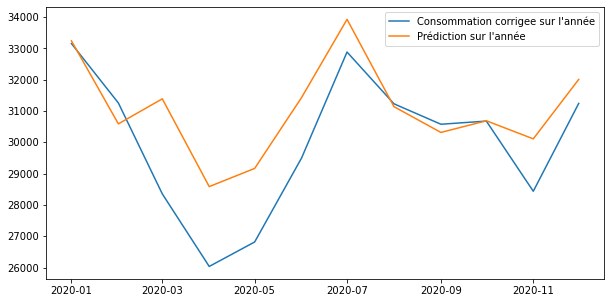

In [40]:
plt.figure(figsize=(10,5))
nb_mois=12
plt.plot(y[-nb_mois:], label="Consommation corrigee sur l'année")
plt.plot(holtwinters_pred2.iloc[-nb_mois:], label="Prédiction sur l'année")
plt.legend()
plt.savefig('graph/holtwinters_pred2_2020.png')

In [41]:
rmse_hw = np.sqrt(((y_a_prevoir-holtwinters_pred2)**2).mean())
rmse_hw

1579.582987040981

In [42]:
mape_hw=(np.abs(1-holtwinters_pred2/y_a_prevoir)).mean()*100
mape_hw

4.238631310090121

In [43]:
# b) Prévoyez une série temporelle à l’aide des méthodes SARIMA

In [44]:
# Stationnarisation de la série

In [45]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.349169
p-value: 0.606388


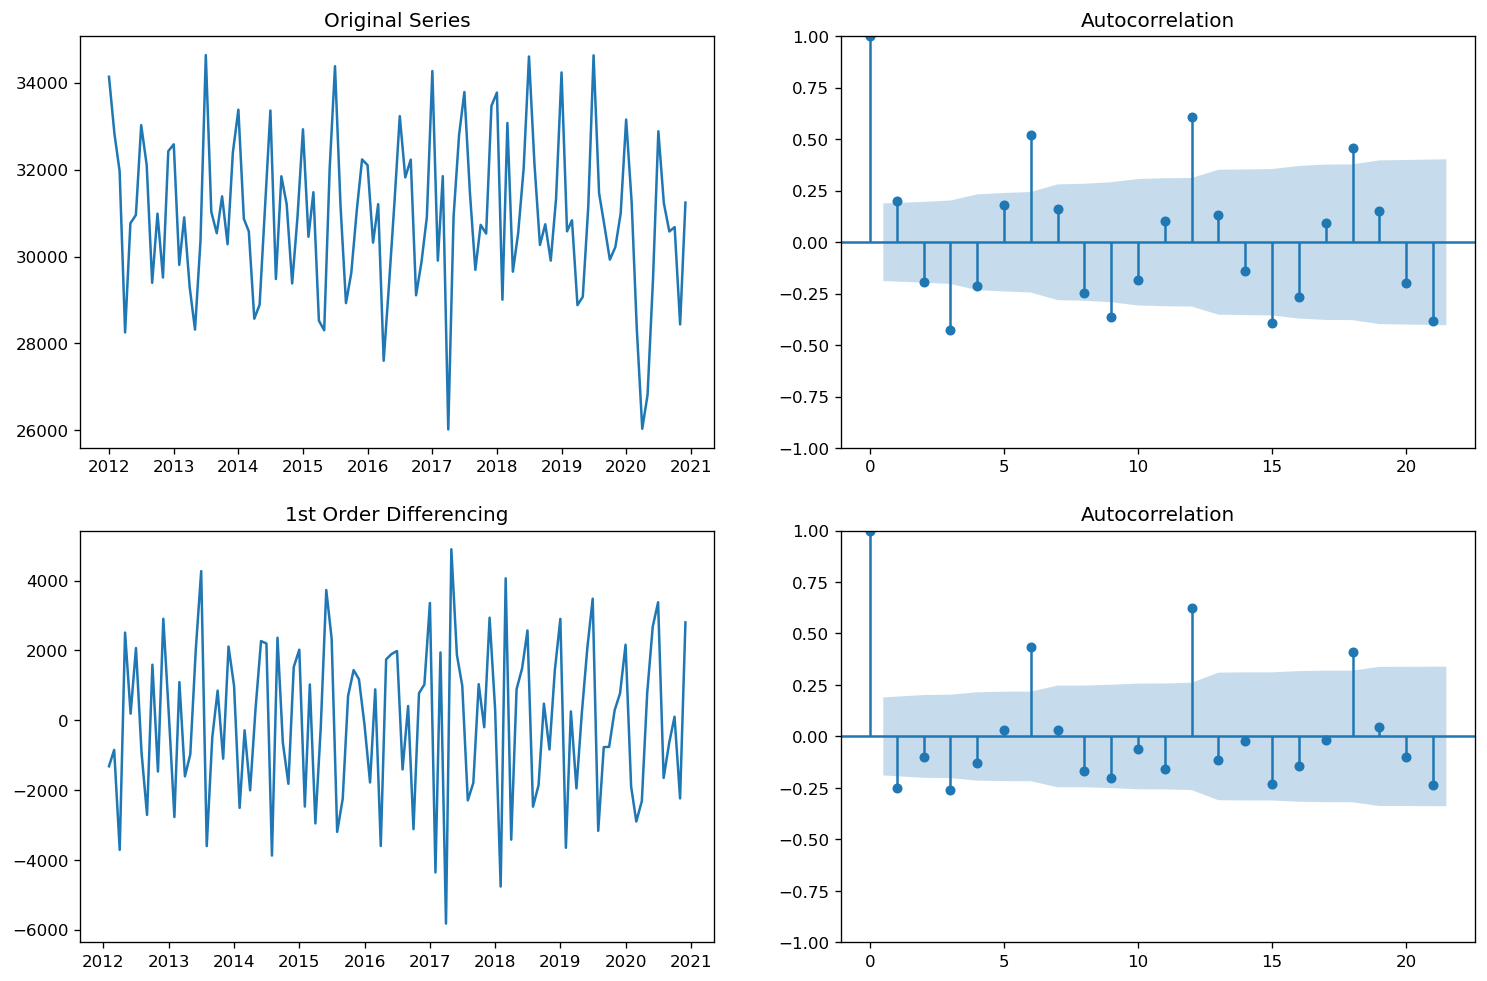

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2, sharex=False)
# sharex or sharey=False permet d'empecher de partager les coordonnées de x ou de y avec tous les axes.
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y-y.shift(1)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])

plt.savefig('graph/order_d.png')

plt.show()

# Etant donné que les coefficients de corrélations du lag sont rapidement négatifs suite à la 1ere différenciation, 
# cela veut dire qu'on a atteint la stationnarité avec le 1er ordre de differenciation: la série est faiblement stationnaire.
# En faisant la différenciation au 2nd ordre, on constate que la série est surdifférenciée.
# Pour la suite, on travaille avec le 1er ordre de différenciation. d=1

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


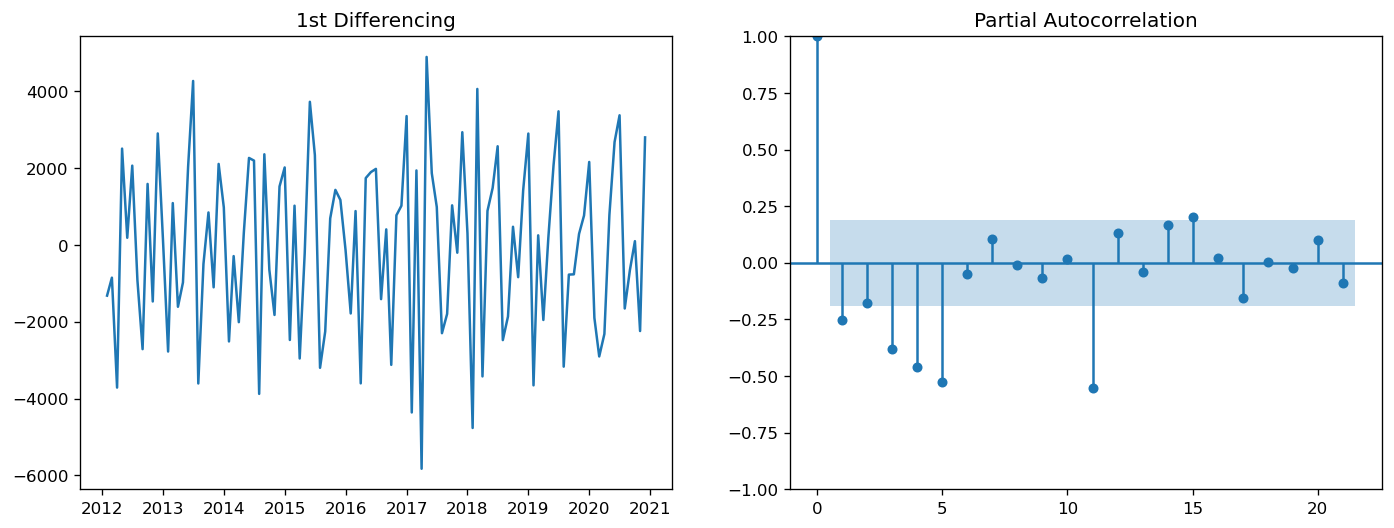

In [47]:
# Finding the p order
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(14,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(y.diff().dropna(), ax=axes[1])
plt.savefig('graph/order_p.png')
plt.show()

In [48]:
#Find the order of the AR term (P)
# p = 2

In [49]:
# find the order of the MA term (q)

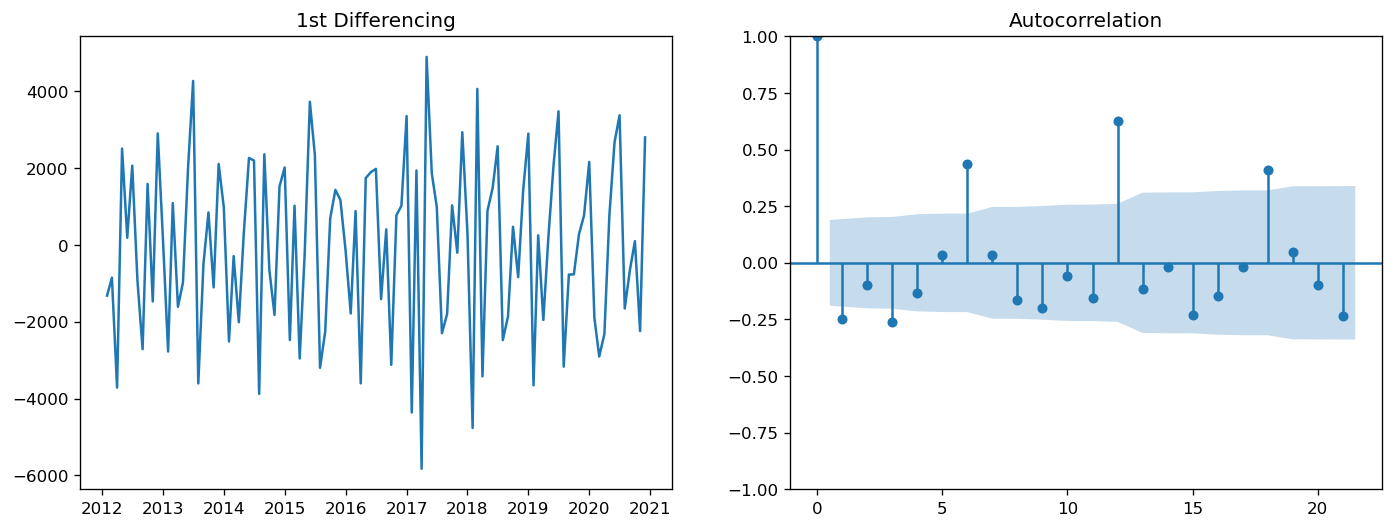

In [50]:

plt.rcParams.update({'figure.figsize':(14,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(y.diff().dropna(), ax=axes[1])
plt.savefig('graph/order_q.png')
plt.show()

In [51]:
# q = 1

In [52]:
from statsmodels.tsa.stattools import acf

# Building automatically SARIMA model in python

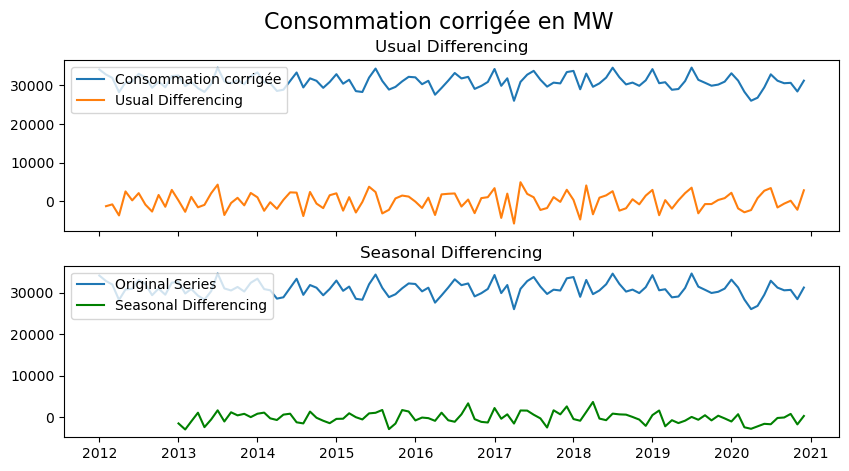

In [53]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(y[:], label='Consommation corrigée')
axes[0].plot(y[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(y[:], label='Original Series')
axes[1].plot(y[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Consommation corrigée en MW', fontsize=16)
plt.show()

In [54]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs


## Adf Test
a_test = ndiffs(y, test='adf')  
print(a_test)
# KPSS test
k_test = ndiffs(y, test='kpss')
print(k_test)
# PP test:
p_test=ndiffs(y, test='pp')
print(p_test)

0
0
0


In [55]:
#pip install pmdarima
# Seasonal - fit stepwise auto-ARIMA

import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data["Consommation corrigee"], start_p=2, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=2, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=7.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1695.609, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1689.019, Time=0.53 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1684.722, Time=1.96 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1693.329, Time=0.39 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=3.51 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1680.649, Time=3.70 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1684.146, Time=1.28 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=1.49 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1681.271, Time=1.16 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=1679.124, Time=0.96 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1682.054, Time=1.45 sec
 ARIMA(0,1,2)(1,1,2)[12]             : AIC=inf, Time=5.75 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=3.46 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -833.215
Date:                            Sat, 01 Jan 2022   AIC                           1678.431
Time:                                    18:11:26   BIC                           1693.754
Sample:                                         0   HQIC                          1684.622
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -75.2247     46.235     -1.627      0.104    -165.843      15.393
ma.L1         -0.1620      0.032     -5.132      0.000      -0.224      -0.100
ma.L2         -0.1611      0.053     -3.031      0.002      -0.265      -0.057
ma.S.L12      -0.4282      0.074     -5.770      0.000      -0.574      -0.283
ma.S.L24      -0.2567      0.057     -4.542      0.000      -0.367      -0.146
sigma2      1.882e+06    2.7e+05      6.958      0.000    1.35e+06    2.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.99   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.01   Prob(JB):                         0.58
Heteroskedasticity (H):               0.51   Skew:                            -0.24
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

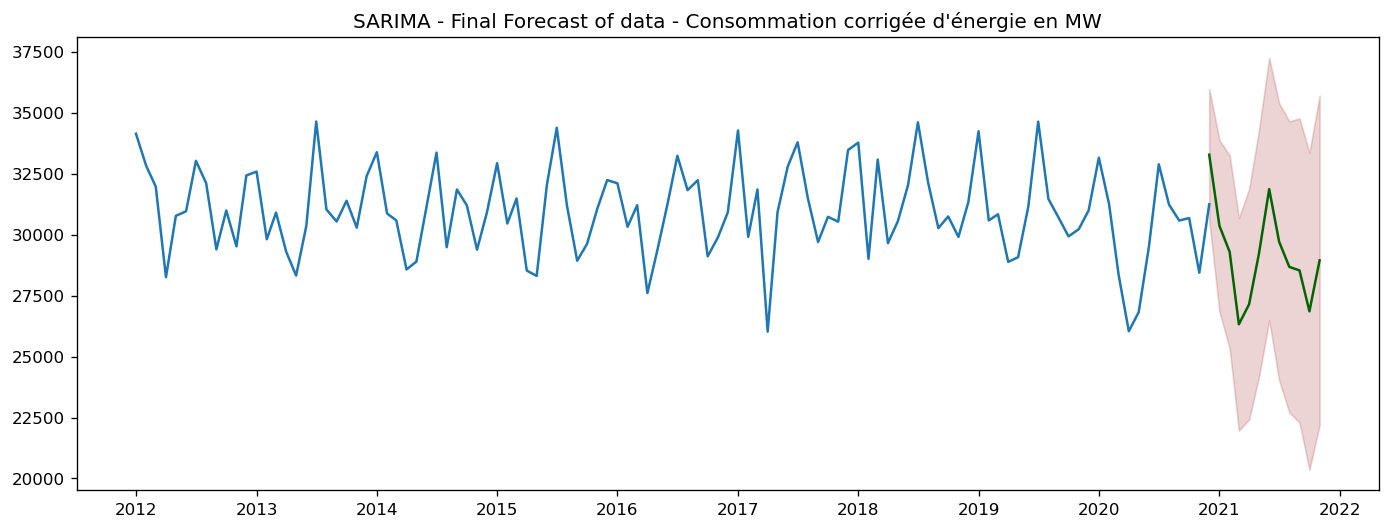

In [56]:
#Let’s forecast for the next 24 months.

# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(y)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='brown', alpha=.20)

plt.title("SARIMA - Final Forecast of data - Consommation corrigée d'énergie en MW")
plt.savefig("graph/SARIMA_forecast_cons.png")
plt.show()

In [57]:
# creation du modele
sarima2_model = SARIMAX(np.asarray(y_tronc), 
                        order=(2,1,0), 
                        seasonal_order=(2,1,1,12), 
                        enforce_invertibility=False, 
                        enforce_stationarity=False)

sarima2_res = sarima2_model.fit(disp=False)
sarima2_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -483.866
Date:                              Sat, 01 Jan 2022   AIC                            979.731
Time:                                      18:11:32   BIC                            991.989
Sample:                                           0   HQIC                           984.495
                                               - 96                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7730      0.169     -4.574      0.000      -1.104      -0.442
ar.L2         -0.4605      0.158     -2.917      0.004      -0.770      -0.151
ar.S.L12      -1.3948      0.101    -13.841      0.000      -1.592      -1.197
ar.S.L24      -0.6061      0.092     -6.572      0.000      -0.787      -0.425
ma.S.L12       1.0100      0.221      4.562      0.000       0.576       1.444
sigma2      1.111e+06   1.86e-07   5.97e+12      0.000    1.11e+06    1.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.43   Prob(JB):                         0.70
Heteroskedasticity (H):               0.67   Skew:                            -0.14
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+28. Standard errors may be unstable.
"""

In [58]:
# prediction
sarima2_pred = sarima2_res.get_forecast(duree)

# on créé un dataframe qui contient pour chacune des dates prédites, la valeurs et l'intervalle de confiance
sarima2_pred = pd.DataFrame(
               {'prediction': sarima2_pred.predicted_mean,
                'interv_conf_inf': [val[0] for val in sarima2_pred.conf_int(alpha=0.05)],
                'interv_conf_sup': [val[1] for val in sarima2_pred.conf_int(alpha=0.05)]
               }, 
               index= y_a_prevoir.index)
sarima2_pred

,prediction,interv_conf_inf,interv_conf_sup
Annee,,,
2020-01-01,33236.166497,31009.741650,35462.591344
2020-02-01,28670.046911,26385.582951,30954.510870
2020-03-01,30871.643721,28465.674677,33277.612766
2020-04-01,27763.090307,24996.251590,30529.929025
2020-05-01,28842.904077,25965.365958,31720.442196
2020-06-01,30911.991102,27877.010670,33946.971535
2020-07-01,33644.774513,30417.600625,36871.948401
2020-08-01,30689.152591,27334.757759,34043.547424
2020-09-01,28704.130361,25205.125825,32203.134896


In [59]:
# prédiction
sarima_pred = sarima2_res.get_forecast(duree)

# on créé un dataframe qui contient pour chacune des dates prédites, la valeurs et l'intervalle de confiance
prediction = pd.DataFrame(
               {'prediction': sarima_pred.predicted_mean,
                'conf_inf': [val[0] for val in sarima_pred.conf_int(alpha=0.05)],
                'conf_sup': [val[1] for val in sarima_pred.conf_int(alpha=0.05)]
               }, 
               index= pd.date_range(y.index.max(), periods=duree, freq='M'))

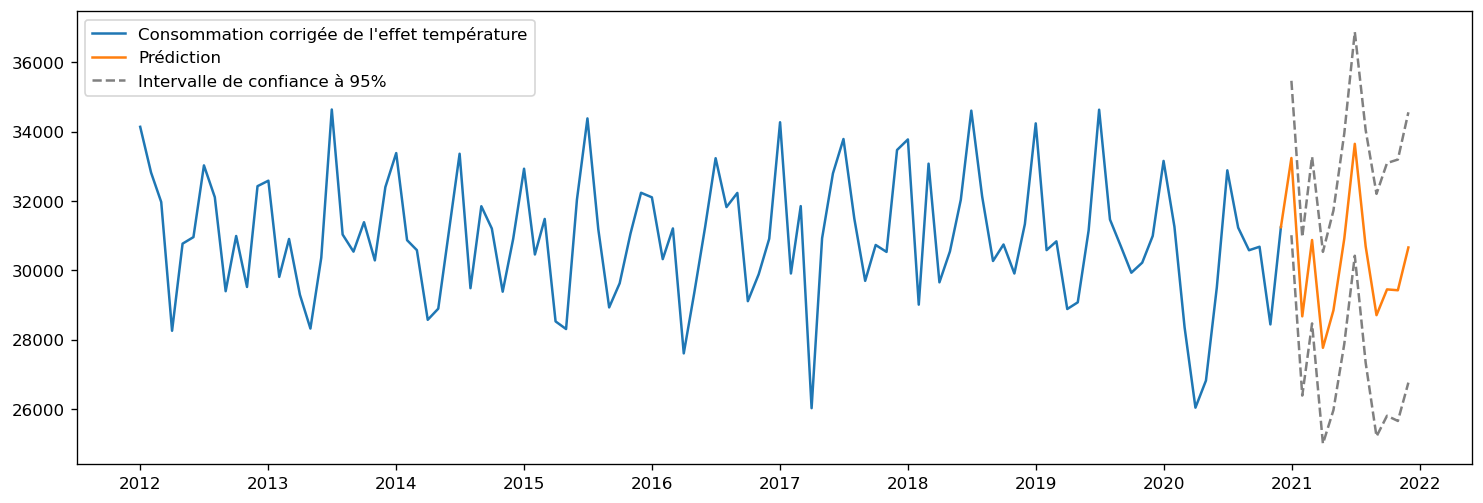

In [60]:
# on ajoute la dernière valeur connue aux valeurs prédites, pour avoir un trait continue (optionnel)
prediction.loc[y.index.max(), 'prediction'] = y[y.index.max()]
prediction.sort_index(inplace=True)
plt.figure(figsize=(15,5))
plt.plot(y, label="Consommation corrigée de l'effet température")
plt.plot(prediction['prediction'], label='Prédiction')
plt.plot(prediction['conf_sup'], label='Intervalle de confiance à 95%', color='grey', linestyle='--')
plt.plot(prediction['conf_inf'], label='', color='grey', linestyle='--')
plt.legend()
plt.savefig("graph/prediction_cons_serie.png")

<ipython-input-61-e8ae2368cd3a>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  sd = pd.datetime(2019,10,1) # None
<ipython-input-61-e8ae2368cd3a>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ed = pd.datetime(2021,10,1)


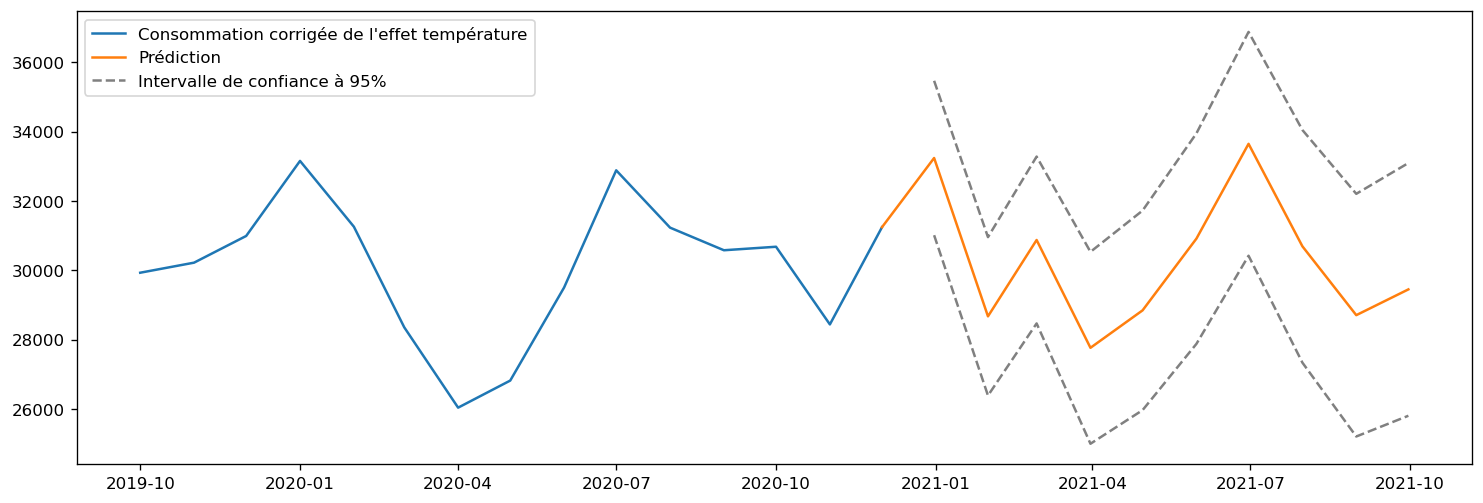

In [61]:
# on peut restreindre l'affichage a des dates précises
sd = pd.datetime(2019,10,1) # None
ed = pd.datetime(2021,10,1)

plt.figure(figsize=(15,5))
plt.plot(y[sd:ed], label="Consommation corrigée de l'effet température")
plt.plot(prediction.loc[sd:ed,'prediction'], label='Prédiction')
plt.plot(prediction.loc[sd:ed,'conf_sup'], label='Intervalle de confiance à 95%', color='grey', linestyle='--')
plt.plot(prediction.loc[sd:ed,'conf_inf'], label='', color='grey', linestyle='--')
plt.legend()
plt.savefig("graph/prediction_cons_2019_2020.png")

In [62]:
x_tronc = data[:'2019']
x_a_prevoir = data['2020':]

In [63]:
from scipy.stats import shapiro

modeltronc = SARIMAX(np.asarray(y), order=(2,1,0), seasonal_order=(2,1,1,12))
resultstronc = modeltronc.fit()
print(resultstronc.summary())

print('Retard : p-value')
for elt in ([6, 12, 18, 24, 30, 36]):
    print('{} : {}'.format(elt, acorr_ljungbox(resultstronc.resid, lags=elt).mean()))
    
shapiro(resultstronc.resid)

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  108
Model:             SARIMAX(2, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -832.048
Date:                              Sat, 01 Jan 2022   AIC                           1676.096
Time:                                      18:11:41   BIC                           1691.419
Sample:                                           0   HQIC                          1682.288
                                              - 108                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1419      0.034     -4.215      0.000      -0.208      -0.076
ar.L2         -0.17

ShapiroResult(statistic=0.47179365158081055, pvalue=5.958082690545952e-18)

In [64]:
# Test de normalité 
# H0: la loi gaussienne est vérifiée
# H1: l'hypothese gaussienne est rejetée
# p_value < 0.05, on rejette H0

In [65]:
pred_modeltronc = resultstronc.get_forecast(12)
pred_tronc = pred_modeltronc.predicted_mean
pred_l_tronc = [elt[0] for elt in pred_modeltronc.conf_int(alpha=0.05)]
pred_u_tronc = [elt[1] for elt in pred_modeltronc.conf_int(alpha=0.05)]


In [66]:
rmse_sarima = np.sqrt(((x_a_prevoir['Consommation corrigee']-pred_tronc)**2).mean())
rmse_sarima

1040.9755128182137

In [67]:
mape_sarima=(np.abs(1-pred_tronc/x_a_prevoir['Consommation corrigee'])).mean()*100
mape_sarima

3.3517294034336453

# La méthode SARIMA est plus précise en terme de prédiction car:

# rmse_sarima < rmse_hw

# mape_sarima < mape_hw
